# Аналитика в авиакомпании

<hr style="border: 1px solid #000;"> 

## Описание проекта
<br> «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления. Предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали. <br>
 
•	model — модель самолета <br>
•	flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года <br>
•	city — город <br>
•	average_flights — среднее количество рейсов, прибывающих в город city за день в августе 2018 года <br>


Задачи данного этапа:

•	выбрать топ-10 городов по количеству рейсов; <br>
•	построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов; <br>
•	сделать выводы по каждому из графиков


<hr style="border: 1px solid #000;"> 

## Обзор данных

In [3]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns  

In [4]:
model = pd.read_csv('/datasets/query_1.csv')
model

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [5]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Всего 8 моделей. Тип данных ок. Странно, что Сухой в топ-3.

In [6]:
city = pd.read_csv('/datasets/query_3.csv')
city

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [7]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Всего 101 город.  Тип данных ок.

In [8]:
city.isna().mean()

city               0.0
average_flights    0.0
dtype: float64

Пропусков нет.

In [9]:
city['average_flights'] = city['average_flights'].round(2) 

In [10]:
city.describe()

,average_flights
count,101.000000
mean,5.493663
std,13.119346
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870000
max,129.770000


Датафреймы в порядке. Типы данных корректны. Столбцы model и city - строки (object), значения в столбце flights_amount - целочисленные, average_flights - числа с плавающей точкой, округлили его до двух знаков.

In [11]:
city.duplicated().sum()

0

<hr style="border: 1px solid #000;"> 

## Анализ и графики

### Топ-10 городов по количеству рейсов

In [12]:
top10 = city.sort_values(by = 'average_flights', ascending = False).head(10)

In [13]:
top10

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


Первая семерка городов предсказуема - это крупнейшие города-миллионники. http://www.statdata.ru/goroda-millionniki-rossii-po-naseleniu <br>
Сочи - одно из главных туристических направлений, тем более в августе. По официальным данным население составляет около 500 тысяч. https://sochi.ru/gorod/sochi-v-tsifrakh/ <br> <br>
Брянск - 420 тысяч http://www.statdata.ru/naselenie/gorod/bryansk. Ульяновск - 650 тысяч http://www.statdata.ru/naselenie/gorod/ulyanovsk. Может быть именно в августе 2018 в этих городах проходили несколько крупных мероприятий, может эти города являются удобным пересадочным узлом. <br>

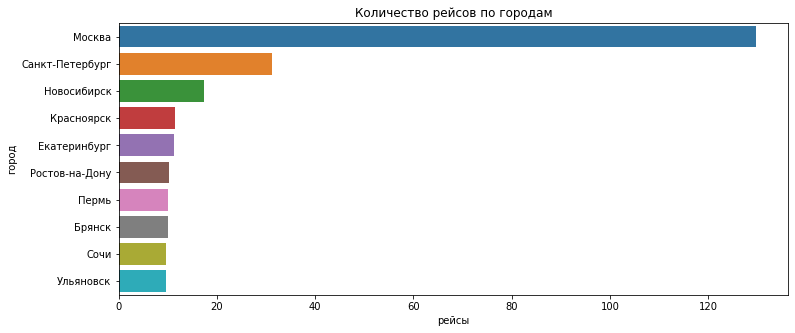

In [12]:
plt.figure(figsize = (12,5))
plt.title('Количество рейсов по городам')  
sns.barplot(data = top10, x = 'average_flights', y ='city')
plt.ylabel('город') 
plt.xlabel('рейсы')
plt.show()

### Города и количество рейсов

In [13]:
city = city.sort_values(by='average_flights', ascending = False)

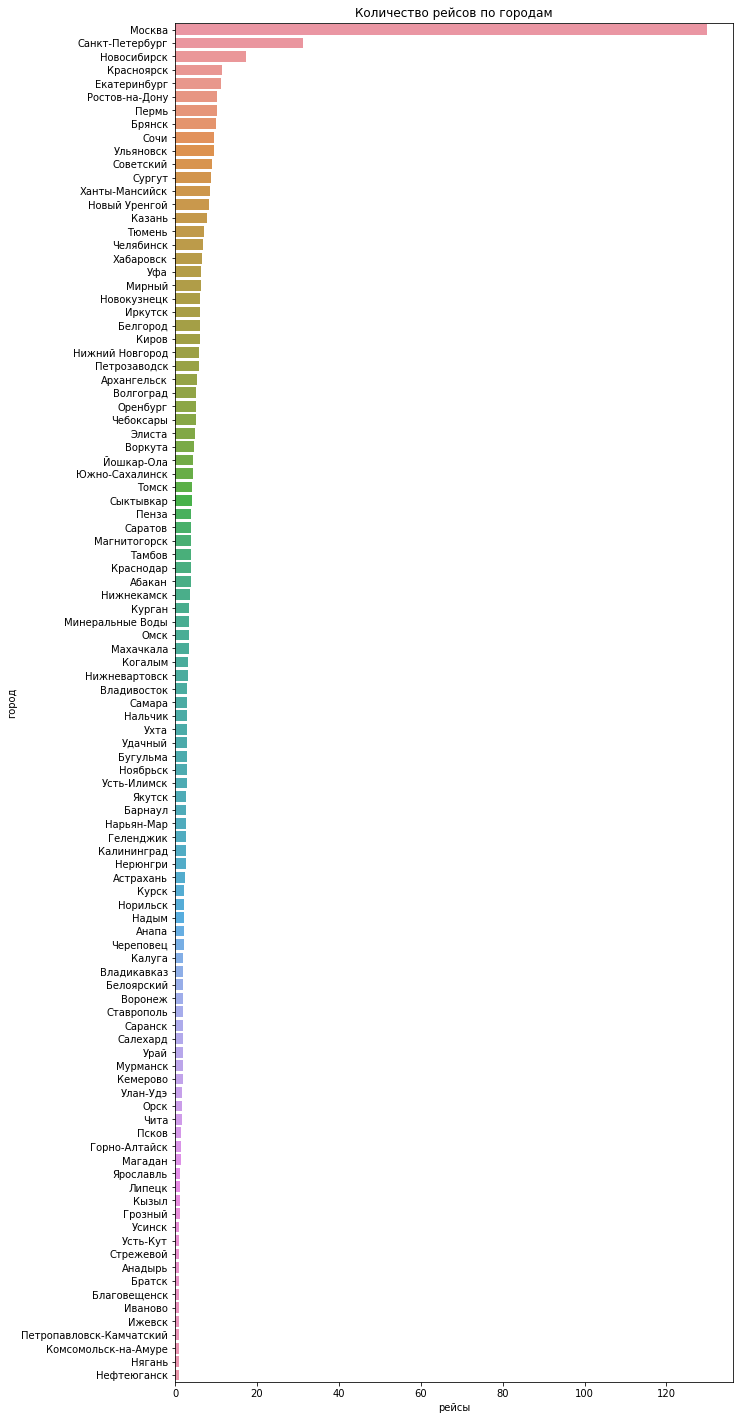

In [14]:
plt.figure(figsize = (10,25))
plt.title('Количество рейсов по городам')  
sns.barplot(data = city, x = 'average_flights', y ='city')
plt.ylabel('город') 
plt.xlabel('рейсы')
plt.show()

In [15]:
city_new = city.query('average_flights < 17')

Посмотрим график без топ3. Плохо видно нижнюю часть.

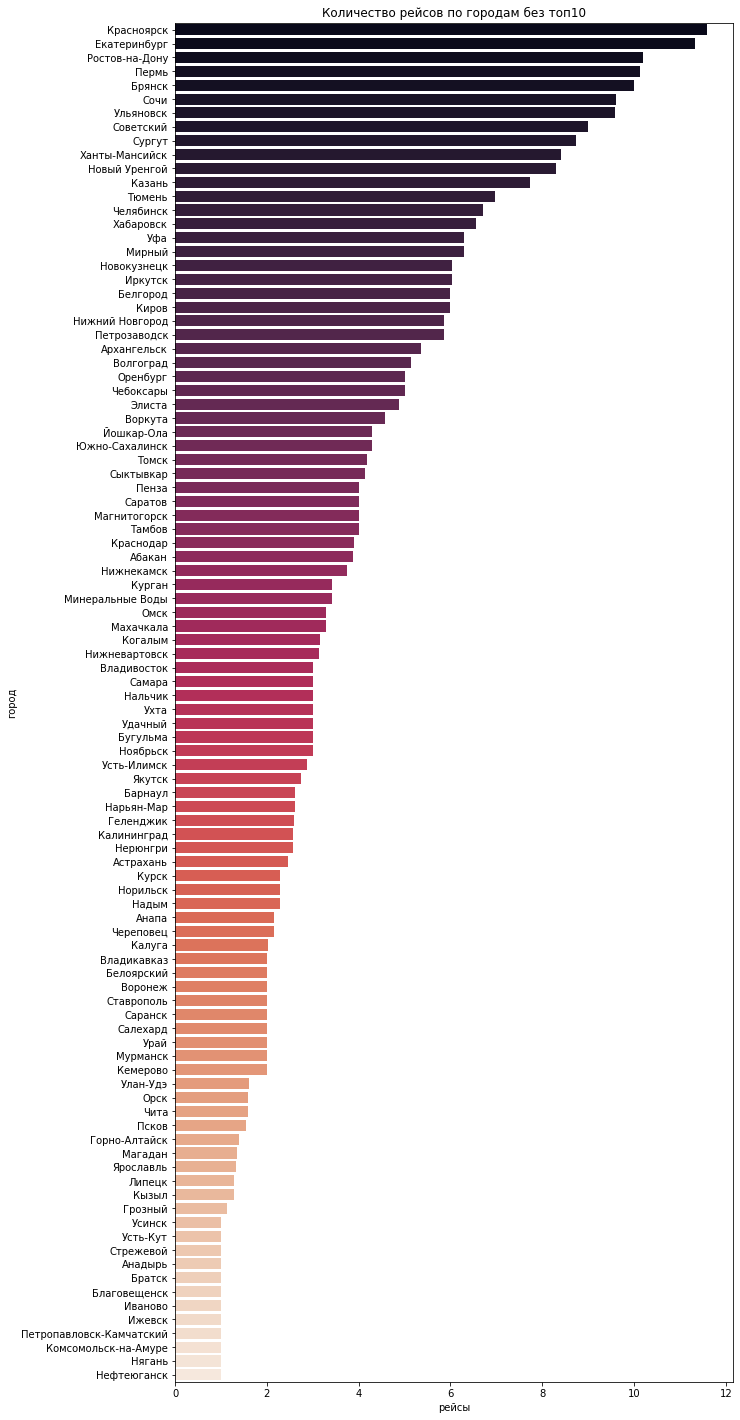

In [16]:
plt.figure(figsize = (10,25))
plt.title('Количество рейсов по городам без топ10') 
sns.set_style({"grid":True})
sns.color_palette("pastel")
sns.barplot(data = city_new, x = 'average_flights', y ='city', palette='rocket')
plt.ylabel('город') 
plt.xlabel('рейсы')
plt.show()

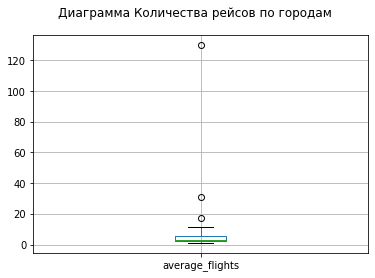

In [17]:
city.boxplot(column='average_flights', grid = True)
plt.suptitle('Диаграмма Количества рейсов по городам')
plt.show()

Посмотрим на боксплот. Выбросы - это значения больше 12: Москва, Петербург и Новосибирск. Посмотрим ближе.

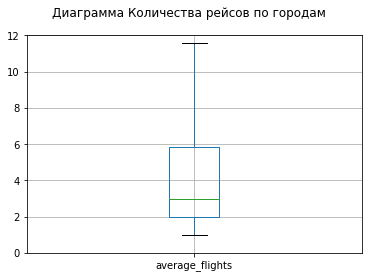

In [18]:
city.boxplot(column='average_flights', grid = True)
plt.suptitle('Диаграмма Количества рейсов по городам')
plt.ylim(0, 12)
plt.show()

Среднее количество рейсов 5,5. Медиана 3. В среднем количество от 2 до 5,8 (межквартильный интервал). Размах от 1 до 11. 

### Модели самолетов и количество рейсов 

In [19]:
model = model.sort_values(by = 'flights_amount', ascending = False)

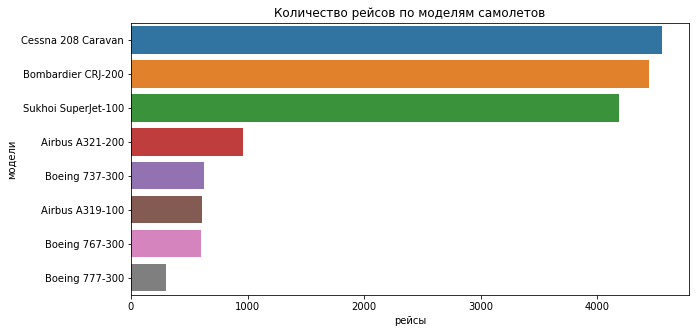

In [20]:
plt.figure(figsize = (10,5))
plt.title('Количество рейсов по моделям самолетов')  
sns.barplot(data = model, x = 'flights_amount', y ='model')
plt.ylabel('модели') 
plt.xlabel('рейсы')
plt.show()

3 модели самолетов, лидеры по числу полетов в сентябре 2018:

Cessna 208 Caravan - 4557 перелетов. Используется на авиалиниях малой протяжённости, дальность 1700. Экипаж самолёта состоит из одного пилота, базовая модель перевозит 9 пассажиров, максимум 14. <br>
Bombardier CRJ-200 - 4446 перелетов. Летает на средние расстояния 3000-3700 км, количество мест 50. <br>
Sukhoi SuperJet-100 - 4185 перелетов. Ближнемагистральный самолёт, предназначенный для перевозки 98 пассажиров на дальность 3000-4600 км.   <br>

Airbus A321-200 - 960. До 180 мест, максимальная дальность 5500 км  <br>
Boeing 737-300 - 630. до 150 мест, 4100 км <br>
Airbus A319-100 - 607.  от 124 до 156 мест, 3700 км <br>
Boeing 767-300 - 600. от 218 до 350 мест, 9700 км <br>
Boeing 777-300 - 300. от 368 до 451 мест,  11000 км.

Наблюдается зависимость - самолеты, летающие на ближние и среднии расстояния совершают больше рейсов

<hr style="border: 1px solid #000;"> 


## Вывод

Мы ознакомились с данными и изучили среднее количество рейсов, прибывающих в город за день в августе 2018 года. Безоговорочный лидер - Москва со 129 рейсами. Далее идут Петербург (31) и Новосибирск (17) - крупнейшие города России. На 4м месте находится Красноярск	с 11 рейсами. Это уже соответствует размаху боксплота - от 1 до 11. В среднем в одном городе выполнялось от 2 до 6 рейсов.
 

Также изучили данные по количеству перелетов за сентябрь 2018 года по каждой модели самолета и обнаружили, что модели   Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100 явлются лидерами по среднему количеству выполненных рейсов.

Исходя из графика количества рейсов и описания моделей самолетов, можно сделать вывод о том, что самолеты с меньшей вместимостью пассажиров и меньшей дальностью полета в сентябре 2018 года летают намного чаще, чем большие модели, способные летать на дальние расстояния. Логично, что за один день на небольших самолетах можно выполнить несколько рейсов. Большие самолеты используются реже. И вообще их количество в целом меньше.

<hr style="border: 1px solid #000;"> 